In [1]:
  import pandas as pd

In [2]:
d=pd.read_csv("taxifare.csv")

In [3]:
d.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [4]:
d.shape

(120000, 8)

In [5]:
d.isnull().sum()

pickup_datetime      0
fare_amount          0
fare_class           0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


# extracting date and time

In [7]:
pd.to_datetime(d["pickup_datetime"])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

In [8]:
d["year"]=pd.to_datetime(d["pickup_datetime"]).dt.year
d["month"]=pd.to_datetime(d["pickup_datetime"]).dt.month
d["day"]=pd.to_datetime(d["pickup_datetime"]).dt.day
d["hour"]=pd.to_datetime(d["pickup_datetime"]).dt.hour
d["minute"]=pd.to_datetime(d["pickup_datetime"]).dt.minute

In [9]:
d.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,8,17
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,15,43
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,11,23
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,21,25
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,2,19


In [10]:
import numpy as np
d['mornight']=np.where(d['hour']<12,0,1)

In [11]:
d.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,mornight
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,8,17,0
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,15,43,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,11,23,0
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,21,25,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,2,19,0


In [12]:
d.drop('pickup_datetime',axis=1,inplace=True)

In [13]:
d.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,mornight
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,8,17,0
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,15,43,1
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,11,23,0
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,21,25,1
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,2,19,0


In [14]:
from sklearn.metrics.pairwise import haversine_distances
p1=np.radians(d["pickup_latitude"])
p2=np.radians(d["pickup_longitude"])

p3=np.radians(d["dropoff_latitude"])
p4=np.radians(d["dropoff_longitude"])
k=[]
for i in range(len(p1)):
    result = haversine_distances([[p1[i],p2[i]], [p3[i],p4[i]]])
    p=result * 6371000/1000

    #print(p[0])
    output = (p[p > 0])
    k.append(output[0])
    
    
d["total_distances"]=k    

In [15]:
d.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,mornight,total_distances
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,8,17,0,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,15,43,1,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,11,23,0,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,11,21,25,1,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,2,19,0,7.231321


In [16]:
d.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

In [17]:
d.head()

,fare_amount,fare_class,passenger_count,year,month,day,hour,minute,mornight,total_distances
0,6.5,0,1,2010,4,19,8,17,0,2.126312
1,6.9,0,1,2010,4,17,15,43,1,1.392307
2,10.1,1,2,2010,4,17,11,23,0,3.326763
3,8.9,0,1,2010,4,11,21,25,1,1.864129
4,19.7,1,1,2010,4,17,2,19,0,7.231321


# REGRESSION MODEL

In [18]:
d.to_csv('final_data.csv')

In [26]:
X=d.iloc[:,1:]
y=d.iloc[:,0]

In [54]:
X_test

,fare_class,passenger_count,year,month,day,hour,minute,mornight,total_distances
68388,0,1,2010,4,16,19,13,1,0.795891
98155,0,1,2010,4,15,19,28,1,1.327654
100520,0,1,2010,4,16,23,33,1,3.277121
119795,0,1,2010,4,23,6,10,0,1.901563
63040,0,5,2010,4,24,23,35,1,1.627122
...,...,...,...,...,...,...,...,...,...
92311,1,2,2010,4,11,12,36,1,9.152060
34252,1,1,2010,4,20,3,41,0,14.034622
5927,0,2,2010,4,21,9,30,0,2.161531
44030,0,3,2010,4,13,19,30,1,2.091677


In [30]:
y

0          6.5
1          6.9
2         10.1
3          8.9
4         19.7
          ... 
119995    15.3
119996    15.3
119997    12.5
119998     4.9
119999     5.3
Name: fare_amount, Length: 120000, dtype: float64

In [28]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\shahul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

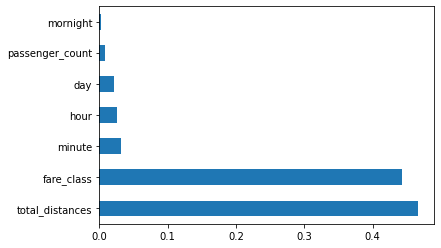

In [21]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [74]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

C:\Users\shahul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [75]:
print(X_test.iloc[:1,:].values)

[[0.00000000e+00 1.00000000e+00 2.01000000e+03 4.00000000e+00
  1.60000000e+01 1.90000000e+01 1.30000000e+01 1.00000000e+00
  7.95890539e-01]]


In [78]:
prediction = reg_rf.predict([[0,1,2010,4,15,19,28,1,1.327654]])
print(prediction)

[6.02]


In [79]:
import pickle
pickle.dump(reg_rf,open("taxi.pkl","wb"))

In [39]:
y_pred=regressor.predict(X_test)

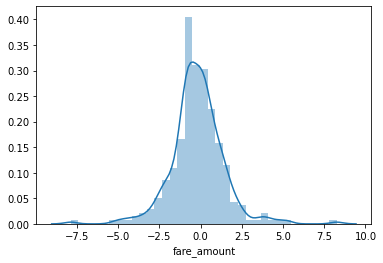

In [40]:
import seaborn as sns
%matplotlib inline
sns.distplot(y_test-y_pred)

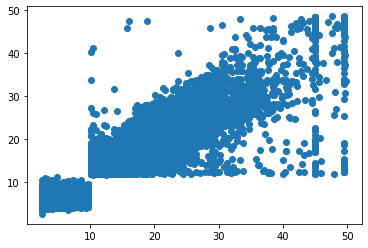

In [26]:
plt.scatter(y_test,y_pred)

In [27]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9411239180731691
MAE: 1.4209380351082483
MSE: 6.5378175473572115
RMSE: 2.556915631646303


In [28]:
import pickle
file=open("taxifare.pkl","wb")
pickle.dump(regressor,file)

# HYPERPARAMETER TUNING

In [28]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [29]:
#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [30]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [31]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgboost.XGBRegressor()

In [32]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
xg_random.best_params_

In [ ]:
xg_random.best_params_

In [ ]:
y_pred=xg_random.predict(X_test)

In [ ]:
sns.distplot(y_test-y_pred)

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

NameError: name 'xg_random' is not defined